In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
#importing data
df =pd.read_csv('Historical_Wildfires.csv')
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
#verify the column names and the data type of each variable
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [4]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [8]:
import datetime as dt
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [10]:
#verify the columns again
df.dtypes


Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int64
Month                                    int64
dtype: object

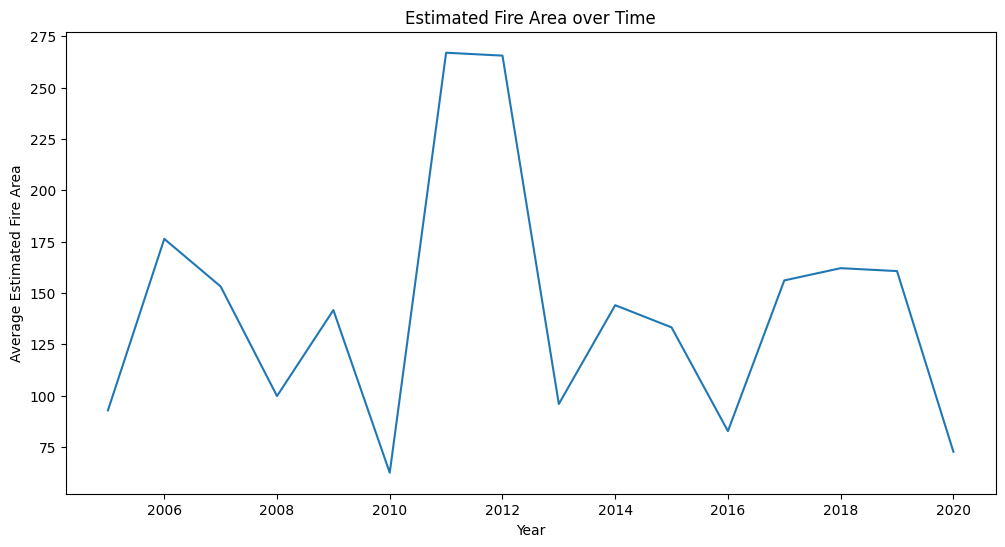

In [11]:
#understand the change in average estimated fire area over time 
plt.figure(figsize=(12,6))
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel("Average Estimated Fire Area")
plt.title('Estimated Fire Area over Time')
plt.show()

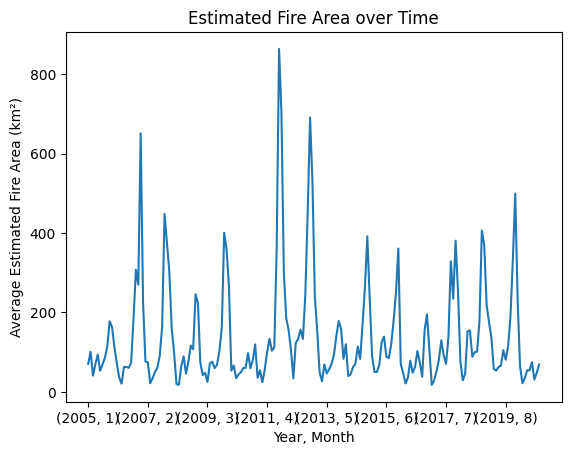

In [12]:
#narrow down our finding by plotting the estimated fire area for year grouped together with month.
df_new=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()


In [13]:
#insight on the distribution of mean estimated fire brightness across the regions
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

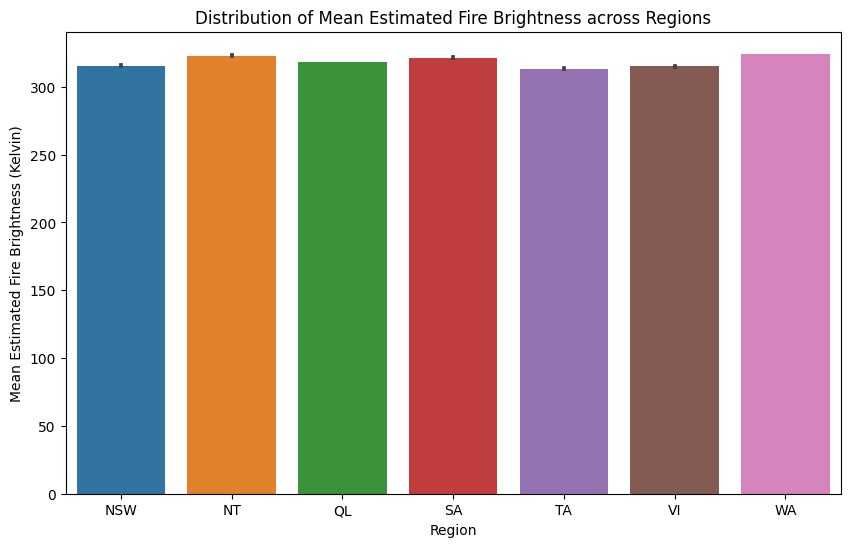

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

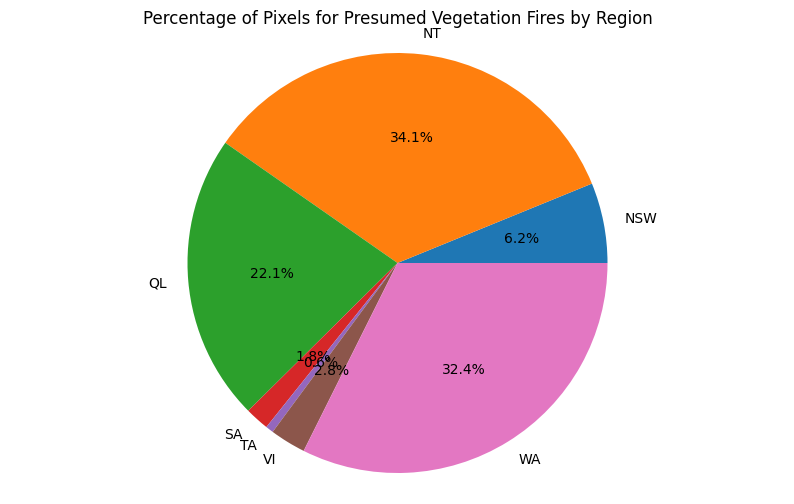

In [15]:
#finding the portion of count of pixels for presumed vegetation fires vary across regions 
plt.figure(figsize=(10, 6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()